<a href="https://colab.research.google.com/github/SawsanYusuf/Houses-Price-Analysis-and-Prediction/blob/main/Houses_Price_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import io

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# **1. Prepare**

## **1.1. Import data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
# Read the csv file 
df = pd.read_csv(io.BytesIO(uploaded["Housing.csv"]))
print(df.shape)
df.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Missing values 
print(df.isnull().sum() / len(df))

#Duplicates
print("Num of Duplicates:", df.duplicated().sum())

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64
Num of Duplicates: 0


## **1.2. Data Exploring**

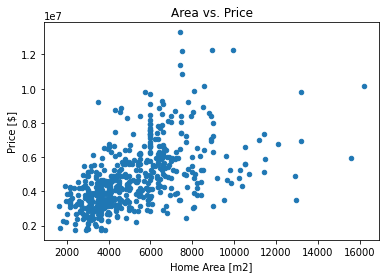

In [ ]:
df.plot(kind="scatter", x="area", y="price", xlabel="Home Area [m2]", ylabel="Price [$]", title="Area vs. Price");

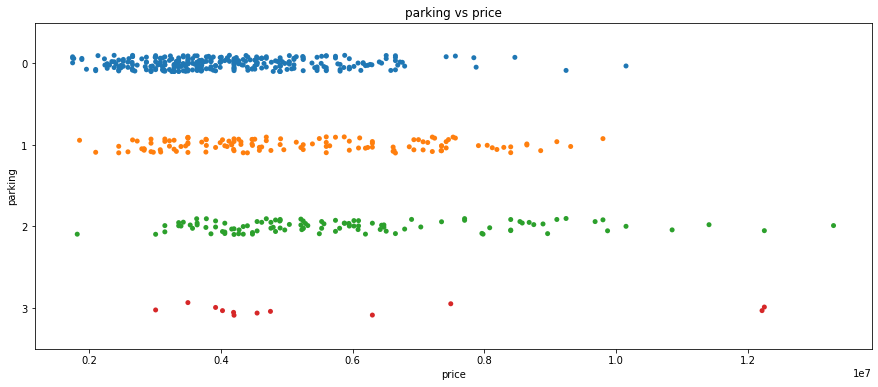

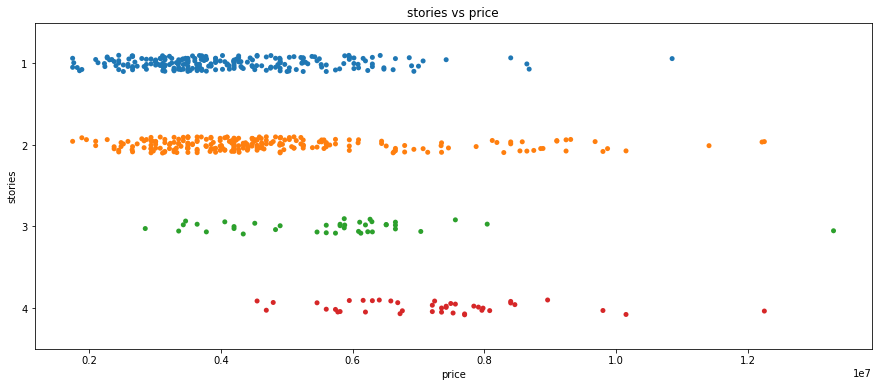

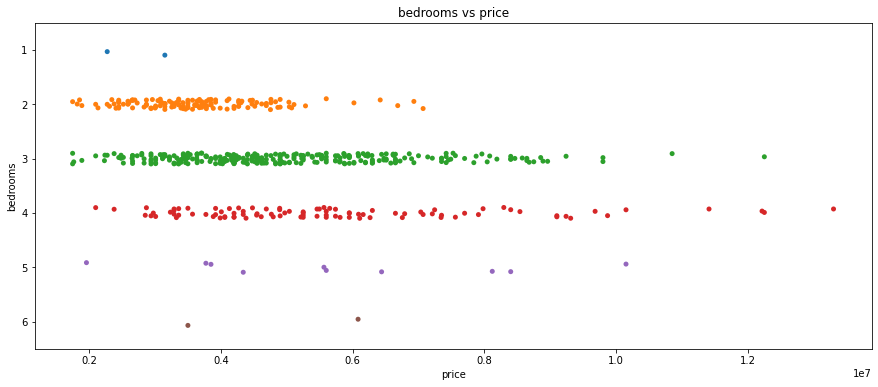

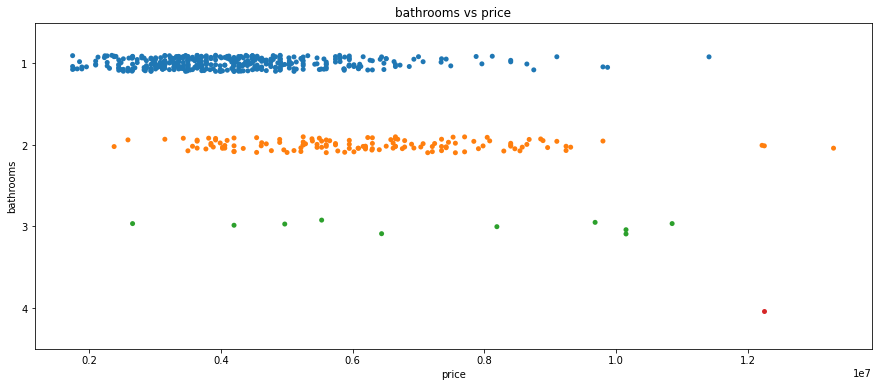

In [ ]:
x_col = "price"
y_columns = ["parking","stories","bedrooms","bathrooms"]

for y_col in y_columns:
    fig,ax=plt.subplots(figsize=(15,6))
    sns.stripplot(df[x_col],df[y_col], orient="h" ,ax=ax)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("{} vs {}".format(y_col, x_col))
    
    plt.show();

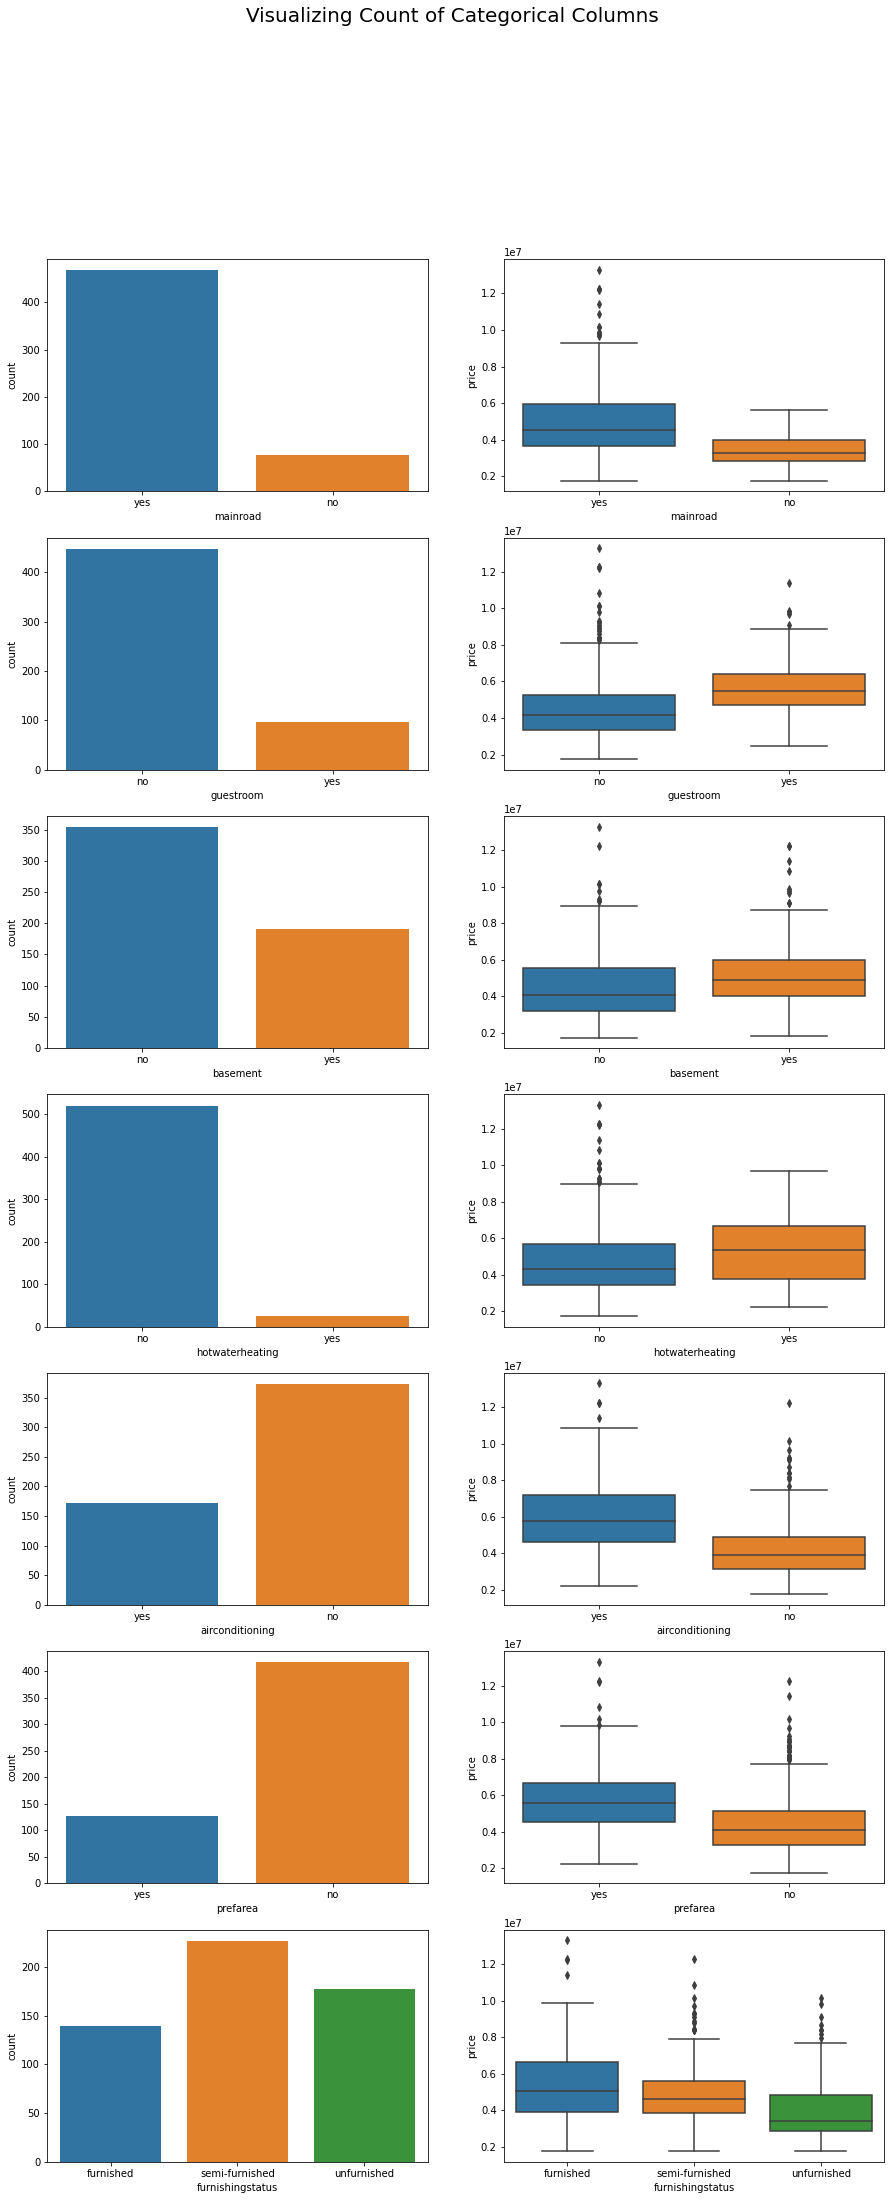

In [ ]:
fig,ax=plt.subplots(7,2,figsize=(15,35))
for index,i in enumerate(df.select_dtypes("object")):
    plt.suptitle("Visualizing Count of Categorical Columns",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.boxplot(data=df,x=i,ax=ax[index,1],y=df["price"])

## **1.4 Feature Encoding**

In [ ]:
lb = LabelEncoder ()

cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## **1.5 Correlation**

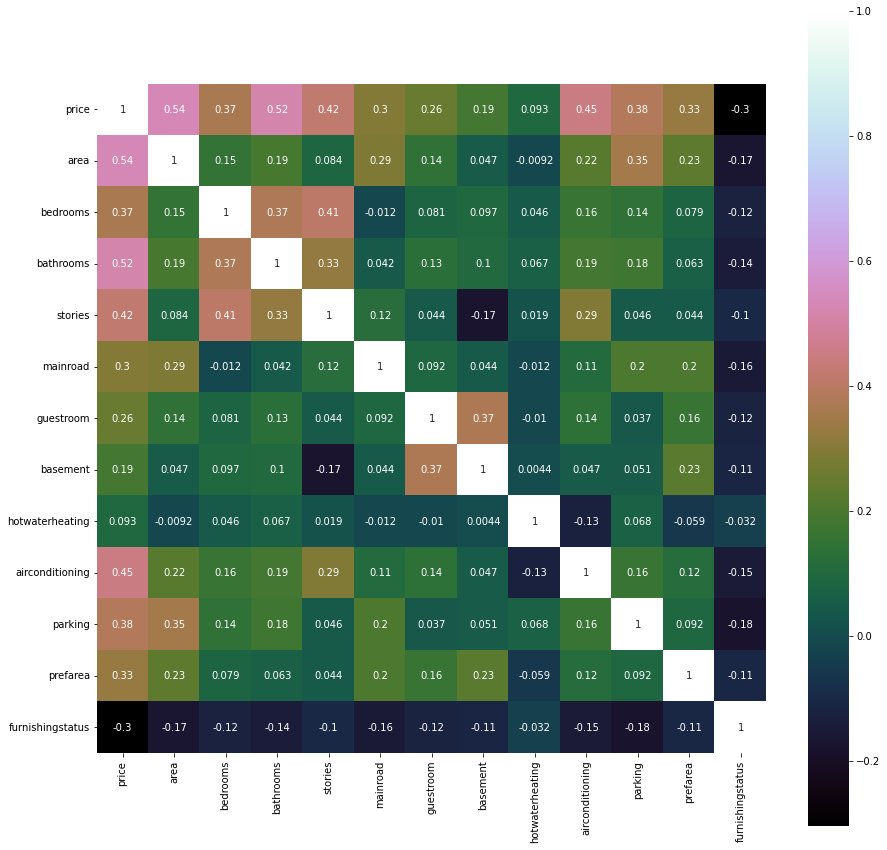

In [ ]:
# Correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title='Correlation Matrix'
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

## **1.4. Split**

In [ ]:
# Features-target split
target = "price"
y = df[target]
X = df.drop(columns= target)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 12)
y_train shape: (436,)
X_test shape: (109, 12)
y_test shape: (109,)


# **2. Build Model**

## **2.1. Baseline**

In [ ]:
y_mean= y_train.mean()
y_pred_baseline =[y_mean] * len(y_train)
print("Mean House Price:", round(y_mean, 2))
print("Baseline MAE:", round(mean_absolute_error(y_train, y_pred_baseline)),0)

Mean House Price: 4706527.39
Baseline MAE: 1350726 0


## **2.2. Iterate**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_training = model.predict(X_train)
y_pred_testing = model.predict(X_test)
print("\nLinear Regression Model\n")
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))
print("Test MAE:", mean_absolute_error(y_test, y_pred_testing))


Linear Regression Model

Training MAE: 718146.5977537858
Test MAE: 979679.6912959901


# **3. Conclusion**

So let's think about all the different things that we learned. When it came to importing, we imported our data into Google Colab. And when it came to exploring, we looked at null and duplicated values. We looked at relationships between our features and our target. Then, We used our label encoder and looked at the correlation. Finally, after splitting the data, we built our linear regression model. 